# AM4 Climate Model

In [2]:
%matplotlib inline 
from mpl_toolkits.basemap import Basemap 
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [3]:
am4 = Dataset('data/GFDL_am4_cli_2009_01.nc')
am4

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): lonDim(144), latDim(91), plevDim(40), timeDim(1)
    variables(dimensions): >f8 lon(lonDim), >f8 lat(latDim), >f8 plev(plevDim), >f8 time(timeDim), >f4 cli(plevDim,latDim,lonDim)
    groups: 

In [7]:
lats = am4.variables['lat'][:]
lons = am4.variables['lon'][:]
plev = am4.variables['plev'][:]
time = am4.variables['time'][:]
cli = am4.variables["cli"][:]
plev

masked_array(data=[1004.22 ,  989.009,  973.755,  958.501,  943.247,
                    927.994,  912.741,  897.488,  882.236,  866.984,
                    850.732,  836.481,  818.689,  795.814,  770.398,
                    744.984,  719.574,  694.163,  662.403,  624.298,
                    586.197,  548.105,  500.023,  471.952,  433.897,
                    395.862,  357.85 ,  315.844,  267.025,  226.723,
                    215.583,  177.661,  147.115,  121.25 ,  100.514,
                     83.439,   67.45 ,   48.282,   34.272,   24.08 ],
             mask=False,
       fill_value=1e+20)

In [8]:
lons, lats = np.meshgrid(lons - 180, lats)

In [ ]:
lons

## AM4 Task 1: 
### * Climate model at pressure level 150hPa

In [ ]:
plev150_cli = cli[-8 ,: ,:]
maximum = plev150_cli.max()
minimum = plev150_cli.min()

In [ ]:
print("max: %f, min: %f" % (maximum,minimum))

In [ ]:
fig = plt.figure(figsize=(14, 14))
m = Basemap()
m.drawcoastlines()
m.drawparallels(np.arange(-90,91,15),labels=[1,0,0,0])
m.drawmeridians(np.arange(m.lonmin,m.lonmax,30),labels=[0,0,0,1])
x,y = m(lons,lats)
z = plev150_cli
cs = m.contourf(x, y, z, np.arange(minimum, maximum, 0.0000001), cmap=plt.cm.rainbow)
cb = m.colorbar(cs)
plt.title('Am4 Cloud Ice Distribution at Pressure Level 150hPa (kg/kg)',fontsize=16, fontweight='bold')


### ** Climate model at pressure level 600hPa

In [ ]:
plev600_cli = cli[21,:,:]
max_plev600 = plev600_cli.max()
min_plev600 = plev600_cli.min()

In [ ]:
print("max: %f, min: %f" % (max_plev600,min_plev600))

In [ ]:
fig = plt.figure(figsize=(14, 14))
m = Basemap()
m.drawcoastlines()
m.drawparallels(np.arange(-90,91,15),labels=[1,0,0,0])
m.drawmeridians(np.arange(m.lonmin,m.lonmax,30),labels=[0,0,0,1])
x,y = m(lons,lats)
cs = m.contourf(x, y, plev600_cli, np.arange(min_plev600, max_plev600, 0.000001), cmap=plt.cm.rainbow)
cb = m.colorbar(cs)
plt.title('Am4 Cloud Ice Distribution at Altitude 600hPa (kg/kg)',fontsize=16, fontweight='bold')

### *** Climate model at pressure level 900hPa

In [ ]:
plev900_cli = cli[8,:,:]
max_plev900 = plev900_cli.max()
min_plev900 = plev900_cli.min()

In [ ]:
print("max: %f, min: %f" % (max_plev900,min_plev900))

In [ ]:
fig = plt.figure(figsize=(16, 16))
m = Basemap()
m.drawcoastlines()
m.drawparallels(np.arange(-90,91,15),labels=[1,0,0,0])
m.drawmeridians(np.arange(m.lonmin,m.lonmax,30),labels=[0,0,0,1])
x,y = m(lons,lats)
cs = m.contourf(x, y, plev900_cli, np.arange(min_plev900, max_plev900, 0.000001), cmap=plt.cm.rainbow)
cb = m.colorbar(cs)

plt.title('Am4 Cloud Ice Distribution at Altitude 900hPa (kg/kg)',fontsize=16, fontweight='bold')

## AM4 Task 2
### Zonal-mean Plot of the Average Cloud Ice Distribution for all Longitude

In [9]:
average_cli_longitude = cli[:,:,:].mean(axis = 2)

In [10]:
latitude = am4.variables['lat'][:]
max_ave_cli_lon = average_cli_longitude.max()
min_ave_cli_lon = average_cli_longitude.min()
print("max: %f, min: %f" % (max_ave_cli_lon,min_ave_cli_lon))

max: 0.000021, min: -0.000000


Text(0.5, 1.0, 'The Average Cli of Longitude: AM4 Zonal-mean Plot')

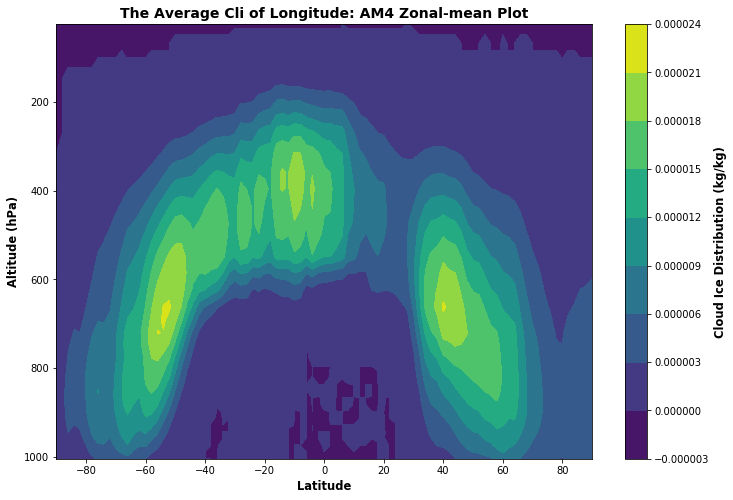

In [13]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
cs = ax.contourf(latitude,plev,average_cli_longitude)
ax.invert_yaxis()
cb = plt.colorbar(cs)
plt.xlabel('Latitude',fontsize = 11.5,fontweight='bold')
plt.ylabel('Altitude (hPa)',fontsize=11.5,fontweight='bold')
cb.set_label('Cloud Ice Distribution (kg/kg)',fontsize = 11.5,fontweight='bold')
plt.title('The Average Cli of Longitude: AM4 Zonal-mean Plot', fontsize=14, fontweight='bold')

## AM4 Task3

In [25]:
ave_cli_lat = cli[:,:,:].mean(axis = 1)
ave_both = ave_cli_lat[:,:].mean(axis = 1)

Text(0.5, 1.0, 'AM4 Average Cli Profile for Longitude and Latitude')

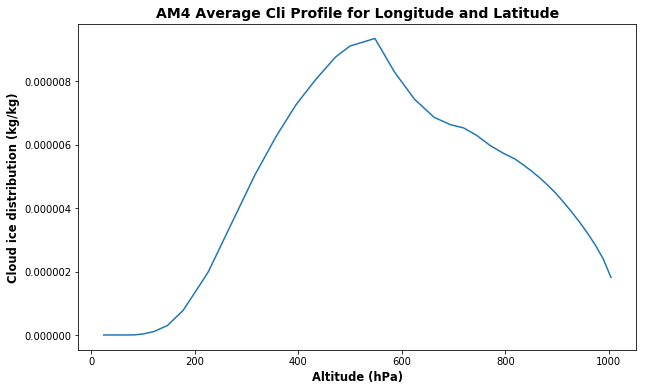

In [43]:
fig = plt.figure(figsize=(10,6))
plt.plot(plev,ave_both)
plt.xlabel('Altitude (hPa)',fontsize = 11.5,fontweight='bold')
plt.ylabel('Cloud ice distribution (kg/kg)',fontsize=11.5,fontweight='bold')
plt.title('AM4 Average Cli Profile for Longitude and Latitude', fontsize=14, fontweight='bold')

In [44]:
max_ave_both = ave_both.max()
min_ave_both = ave_both.min()
print("max: %f, min: %f" % (max_ave_both,min_ave_both))

max: 0.000009, min: 0.000000
